In [1]:
## Data Visualization and data cleaning 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
## Choosing index column as date_time because it is Time series data set
## Its is having dates so parse dates is true
## Its a large file so low memory is false

data= pd.read_csv('household_power_consumption.txt', sep= ';',  
                  parse_dates= True, 
                  low_memory = False )
                  

In [13]:
## head displays the of the data set.

data.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [14]:
## Creating date_time column using cancatnate funntion 

data['date_time'] = data['Date'].str.cat(data['Time'], sep= ' ')


In [15]:
## Now date_time column is at the last in single coulmn 

data.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [16]:
## So dropping the Date and Time column 

data.drop(['Date', 'Time'], inplace = True, axis = 1)

In [17]:
## It is dropped now

data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [18]:
#setting index as date_time column 

data.set_index(['date_time'], inplace = True) 

In [19]:
# date_time is set to index column 

data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
16/12/2006 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
16/12/2006 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
16/12/2006 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
16/12/2006 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [20]:
## info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [22]:
# replace missing values as nan 

data.replace('?', nan , inplace= True)

In [25]:
## The dataset needed to convert to float because all the values in decimels 

data= data.astype('float')

In [26]:
## So it is converted now to float 

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7+ MB


In [27]:
## Summing the nan values , it shows 25979 as missing values 

np.isnan(data).sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [30]:
## Filling these values with previous day values using for loop.

def insert_missing(data):
    one_day= 24 * 60
    for row in range(data.shape[0]):
        for col in range (data.shape[1]):
            if np.isnan(data[row,col]):
                data[row,col] = data [row - one_day, col]

In [32]:
## insert missing values 

insert_missing(data.values)

In [33]:
##checking is their any nan values , it shows zero so our dataset is cleaned now

np.isnan(data).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [34]:
## describe() gives Descriptive statistics include those that summarize the central tendency, dispersion and a shape of a datase

data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089418e+00,1.236871e-01,2.408364e+02,4.618401e+00,1.118474e+00,1.291131e+00,6.448635e+00
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [36]:
## to show rows and columns 

data.shape

(2075259, 7)

In [42]:
## data is saved as csv file 

data.to_csv('Preprocessed data.csv')

In [43]:
## Reading the csv flie 

df = pd.read_csv('Preprocessed data.csv', parse_dates= True, index_col = 'date_time', low_memory = False )

In [44]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [45]:
##  Resample helps to sum the values for a day. 


data= df.resample('D').sum()

In [46]:
## head displays the of the data set.
## As you can see here it is resampled for day consumtion.

data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


## Visualization for the attribute Global active power for all the years 

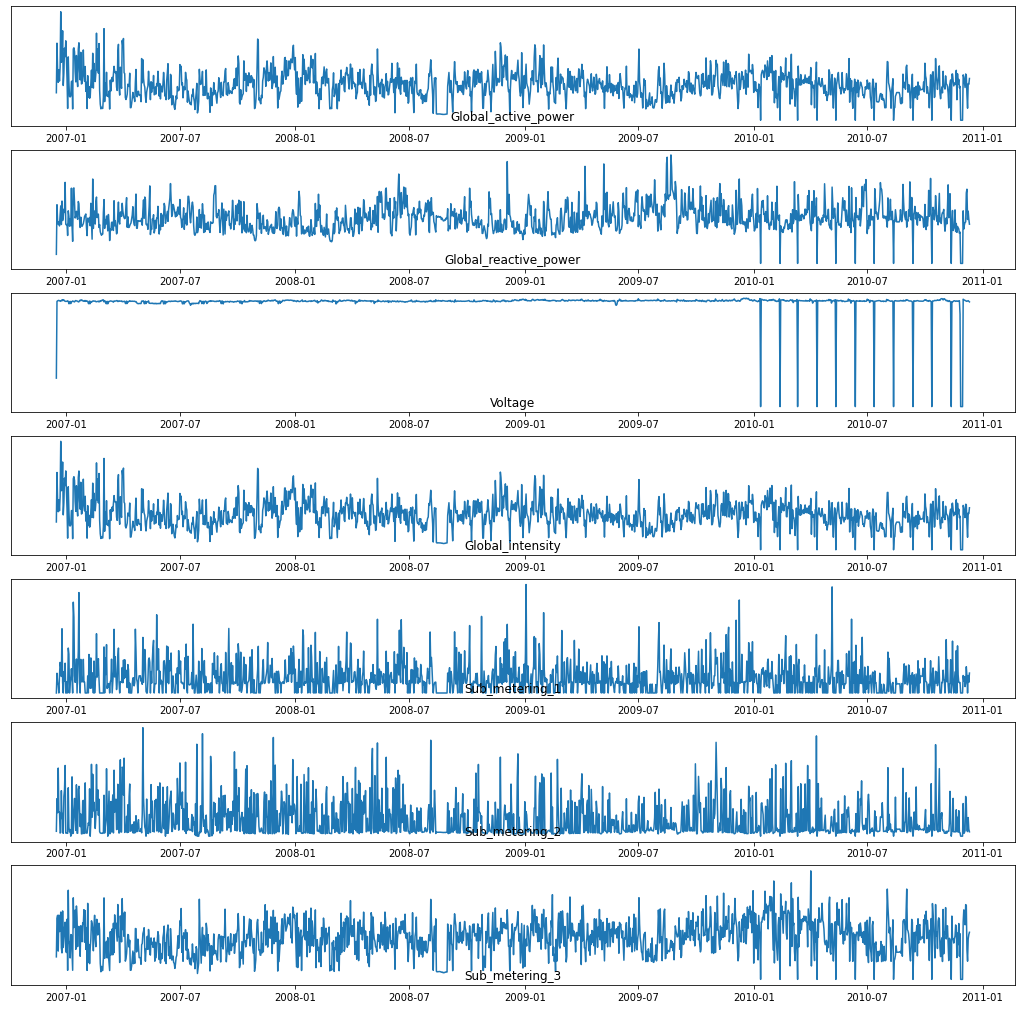

In [50]:
fig , dx= plt.subplots(figsize = (18, 18))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name= data.columns[i]
    plt.plot(data[name])
    plt.title(name, y= 0) 
    plt.yticks([ ])
plt.show()
fig.tight_layout()

    

In [51]:
## Represeting individual year as years 

years= ['2007', '2008', '2009', '2010']

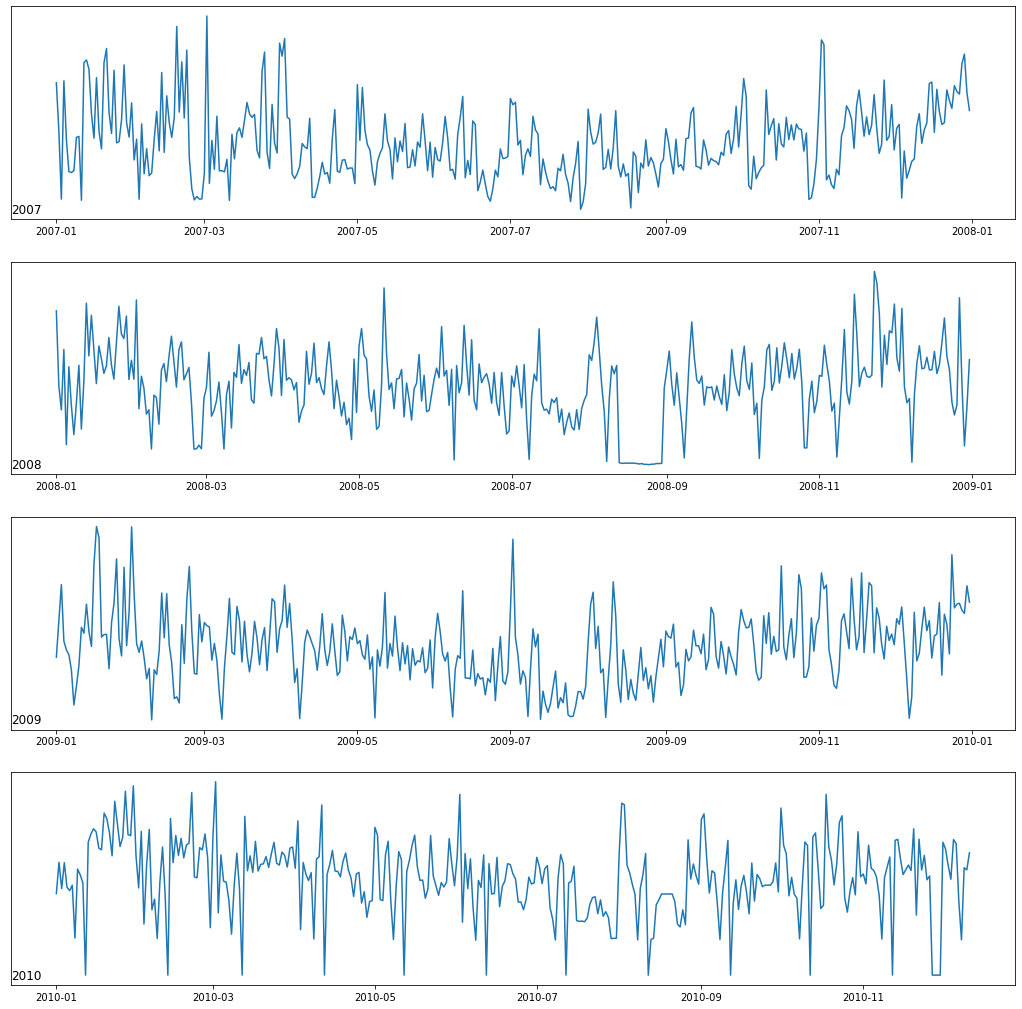

In [52]:
## Showing visualization for each year. we can see peaks in Jan and December for the year 2007, It varies among different years

fig , dx= plt.subplots(figsize = (18, 18))
for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power= data[str(year)]
    plt.plot(active_power['Global_active_power'])
    plt.title(str(year),y= 0, loc= 'left') 
    plt.yticks([ ])
plt.show()
fig.tight_layout()

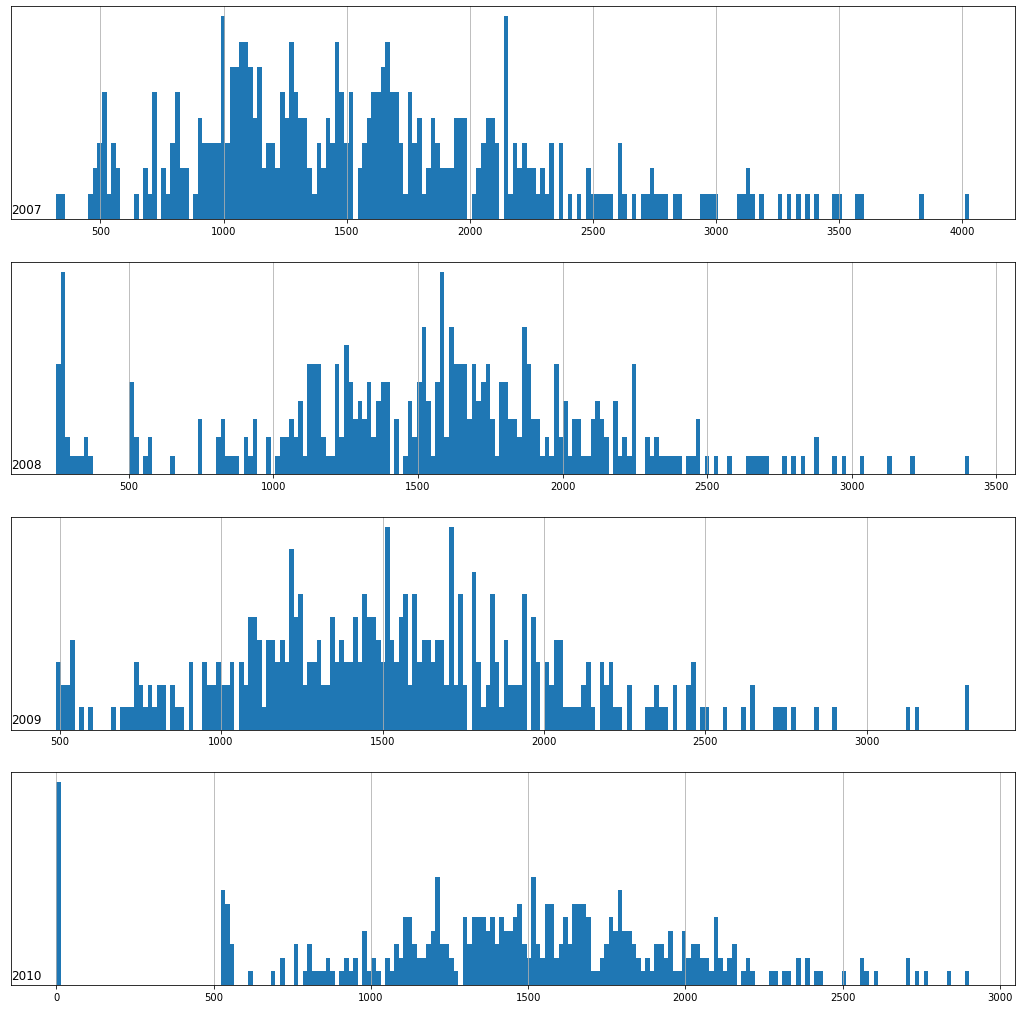

In [57]:
## Plotting the histogram to know power consumed in each year and month.

fig , dx= plt.subplots(figsize = (18, 18))
for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power= data[str(year)]
    active_power['Global_active_power'].hist(bins= 200)
    plt.title(str(year),y= 0, loc= 'left') 
    plt.yticks([ ])
plt.show()
fig.tight_layout()

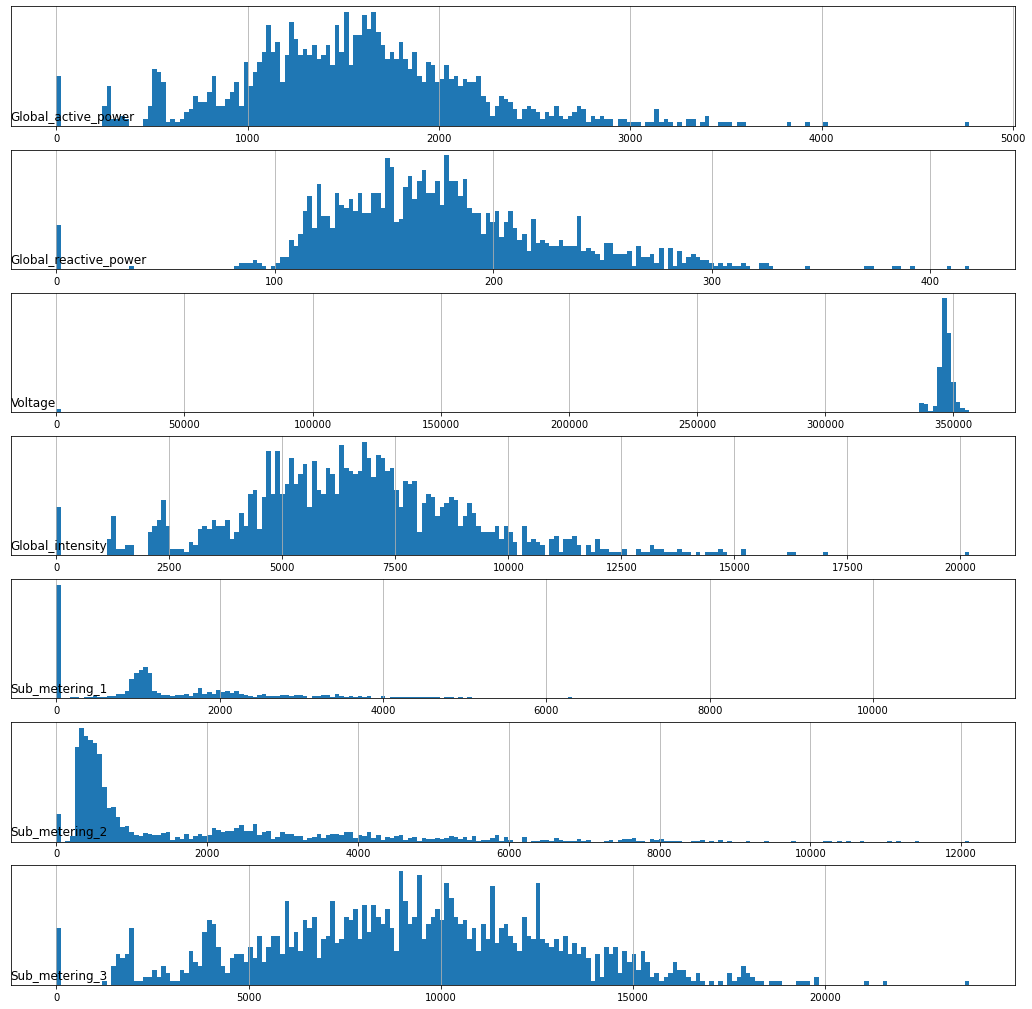

In [59]:
## This shows the overall features consumed.

fig , dx= plt.subplots(figsize = (18, 18))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name= data.columns[i]
    data[name].hist(bins=200)
    plt.title(name, y= 0, loc = 'left') 
    plt.yticks([ ])
plt.show()
fig.tight_layout()

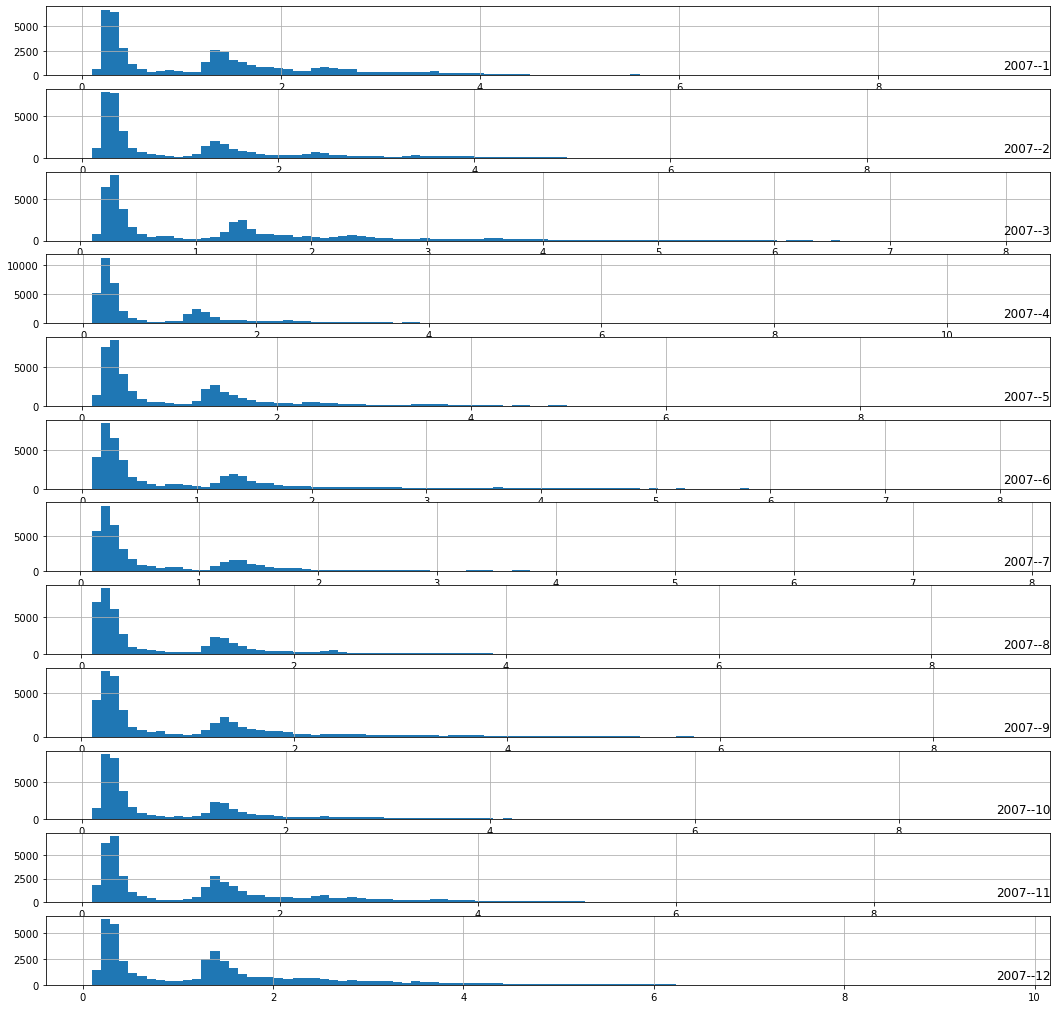

In [72]:
## This shows power consumption for indivvidual year. 

months = [i for i in range (1,13)]

fig, dx = plt.subplots(figsize= [18,18])

for i in range(len(months)):
    plt.subplot(len(months), 1, i+1)
    month = '2007--' + str(months[i])
    active_power= df[month]
    active_power['Global_active_power'].hist(bins= 100)
    dx.set_xlim( 0, 5)
    plt.title(month ,y= 0, loc= 'right') 
plt.show()
fig.tight_layout()